# Project Foundations for Data Science: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation

import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Understanding the structure of the data

In [3]:
# read the data
data_csv = pd.read_csv('/Users/vineethadevassiakaithakkal/Documents/Vineetha - 2023/MIT/Python/foodhub_order.csv')
df = data_csv.copy()
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [5]:
# code to find the rows and columns present
df.shape

(1898, 9)

#### Observations:


There are 1898 rows and 9 columns in the dataframe.

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

* All columns have 1898 observations.
* The data set contains one float variable, 4 integer variables and 4 objects
* restaurant_name, cuisine_type, day_of_the_week and rating should be categorical variables. 

In [7]:
# Write your code here
missing_values = df.isna().sum()
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:


There are no missing values in the data.


In [8]:
# Code to check the statistical summary
food_preparation_time_summary=df['food_preparation_time'].describe()
print(food_preparation_time_summary)

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


#### Observations:


Minimum time is 20 mins , average time is 27 mins and maximum time is 35 mins.

In [10]:
# Find the ratings and the count of each rating given
df['rating'].value_counts()


Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:

736 orders are not rated in the data set.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

In [11]:
# check the quisine types at the restaurants
df['cuisine_type'].value_counts()


American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

Most popular cuisine is American


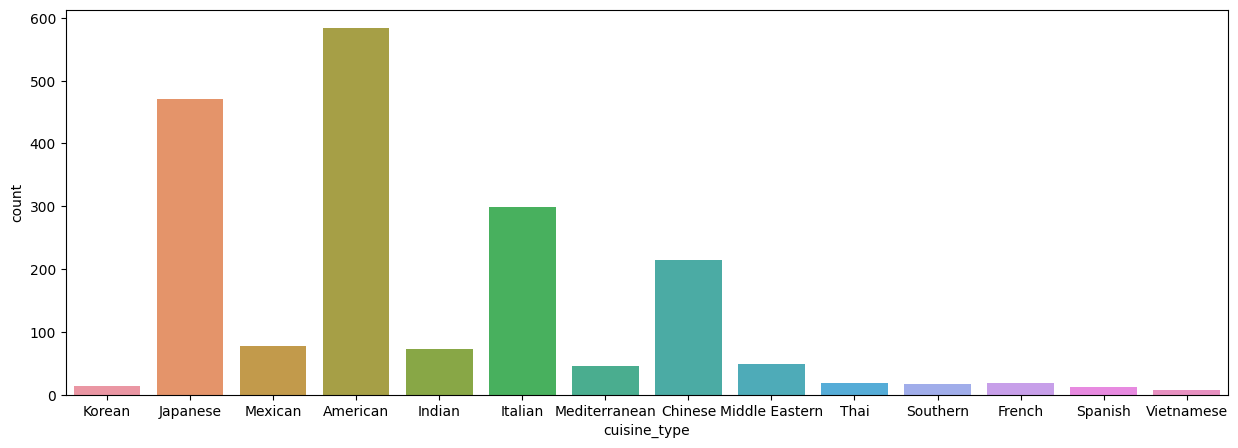

In [12]:
# Create a count plot for cuisine type
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'cuisine_type')
plt.show()

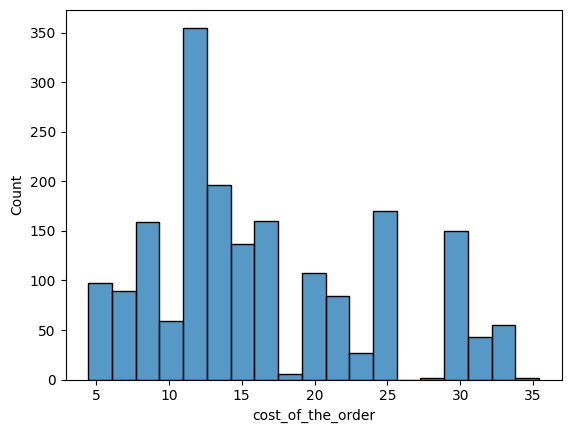

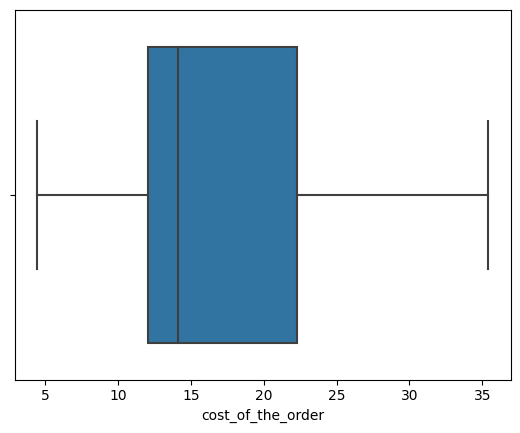

In [13]:
# Cost of the order in histogram and and boxplot

sns.histplot(data=df,x='cost_of_the_order') 
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

Postive squeness in the chart shows a few orders with an unusually high cost


In [12]:
# day of the week the orders are placed
df['day_of_the_week'].value_counts()


Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

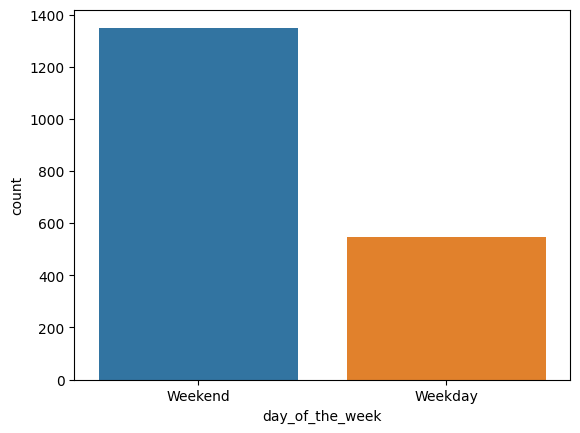

In [16]:
# day of the week Vs count
sns.countplot(data = df, x = 'day_of_the_week')
plt.show()

* Weekends are the busiest as most of the orders are on weekends
* Weekday orders are almost just below the than 1/2 of weekend orders

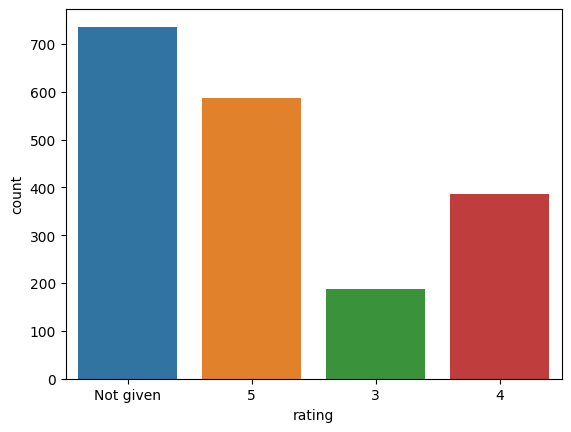

In [25]:
# compare the rating 
sns.countplot(data = df, x = 'rating')
plt.show()

* Out of 1898 orders placed around 700 orders are not given a rating
* Around 600 orders are given a rating of 5

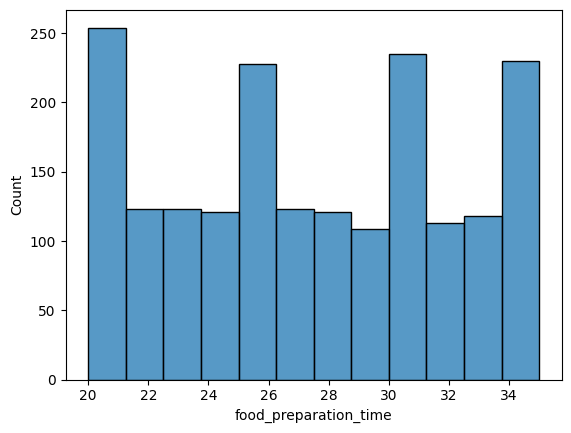

In [21]:
# Compare food preparation time 
sns.histplot(data = df, x = 'food_preparation_time')
plt.show()

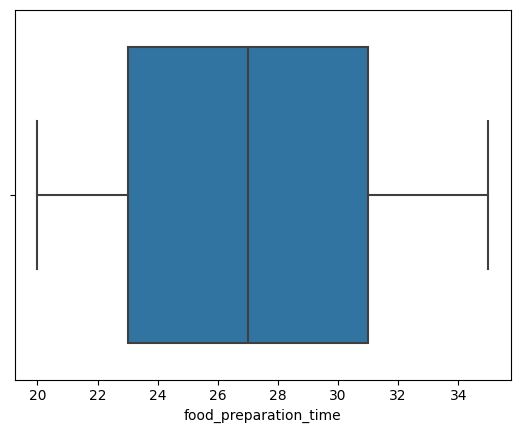

In [26]:
sns.boxplot(data = df, x = 'food_preparation_time')
plt.show()

* Average food preparation time is 27 mins
* There are no outliers in the delivery time

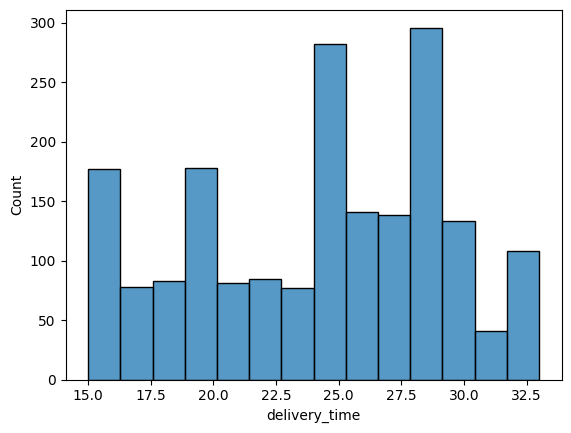

In [27]:
# Compare delivery time 
sns.histplot(data = df,x = 'delivery_time')
plt.show()

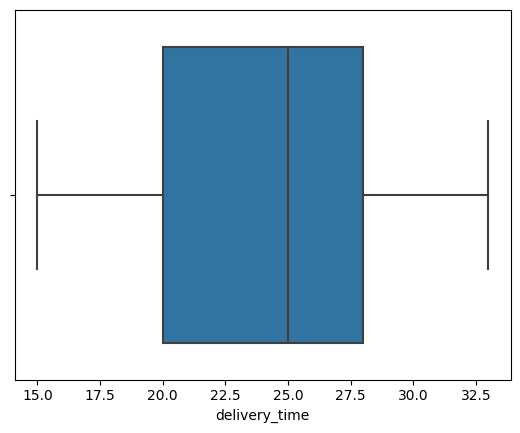

In [28]:
sns.boxplot(data = df,x = 'delivery_time')
plt.show()

* Mean delivery time is 25 mins

* Delivery time is negatively skewed means there are some with an unusual quick delivery time in Q1.


In [31]:
# Display the plot
top_five_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_five_restaurants)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:


Shake Shack restaurant is at Rank 1 with 219 orders.

In [4]:

#unique_days=df['day_of_the_week'].unique()
#print(unique_days)
week_end_cuisine=df[df['day_of_the_week']=='Weekend']
most_popular_weekend_cuisine=week_end_cuisine['cuisine_type'].value_counts().head(1)
print(most_popular_weekend_cuisine)


American    415
Name: cuisine_type, dtype: int64


#### Observations:


Most popular cuine on weekends is American

In [36]:
# Write the code here
cost_greater_than_20 = df[df['cost_of_the_order']>20]

#percentage of orders cost > 20
percentage_cost_greater_than_20 = (cost_greater_than_20.shape[0]/df.shape[0])*100
print("Percentage of orders cost more than 20 is ",round(percentage_cost_greater_than_20,2),"%")

Percentage of orders cost more than 20 is  29.24 %


#### Observations:


A significant percentage of orders cost a higher value.

In [88]:
# Code to find the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()
print("Mean order delivery time is ",round(mean_delivery_time,2),"mins")

Mean order delivery time is  24.16 mins


#### Observations:


Average delivery time to pick up food from restaurant to deliver to the customer is 24.16 mins

In [89]:
# Code to find the most frequent customers by taking the count of orders against customer id
frequent_customers = df['customer_id'].value_counts()


In [47]:
print(frequent_customers)

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64


In [46]:
top_3_customers = frequent_customers.head(3).index.tolist()


In [45]:
print("The ids of top 3 most frequent customers are", top_3_customers)

The ids of top 3 most frequent customers are [52832, 47440, 83287]


#### Observations:


Customer with id 52832 is at the top with 13 orders.

### Multivariate Analysis

#### Cuisine Vs Food Preparation time 

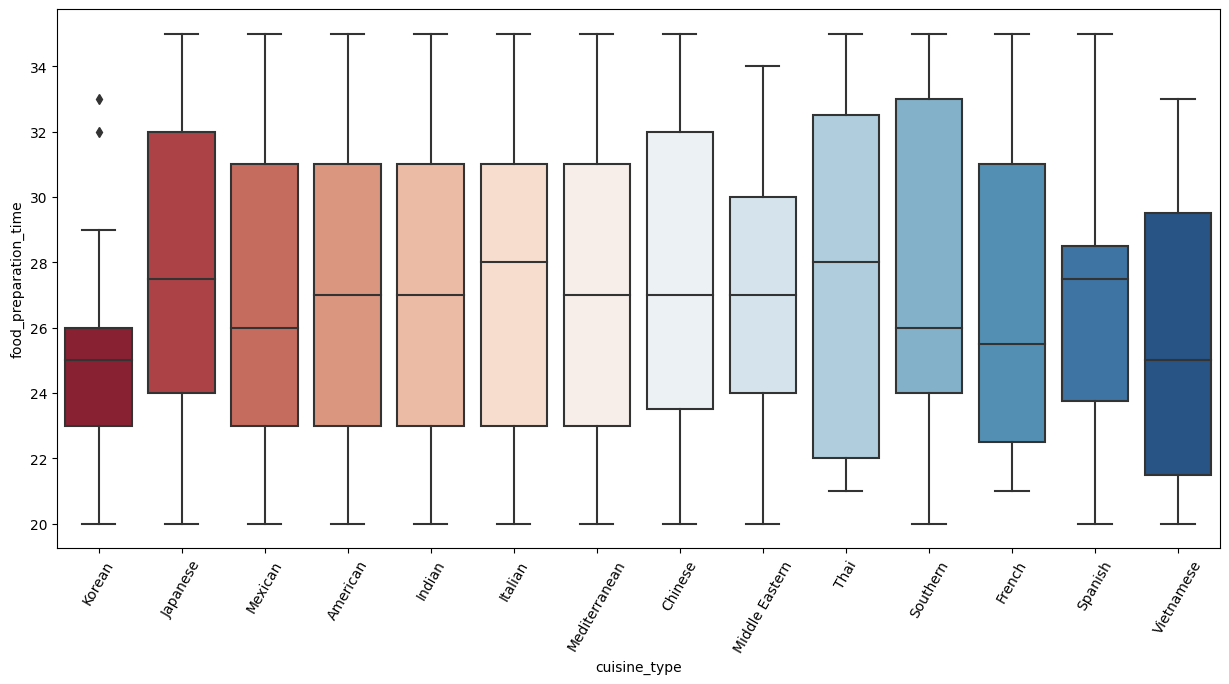

In [53]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
#box plot to show the relationship
sns.boxplot(x = 'cuisine_type',y = 'food_preparation_time', data = df, palette = 'RdBu')  
plt.xticks(rotation = 60)
plt.show()

There are two outliers in the Korean cuisine also sothern and french cuisine has some cuisines with high preparation time


#### Cuisine Vs Cost of the order

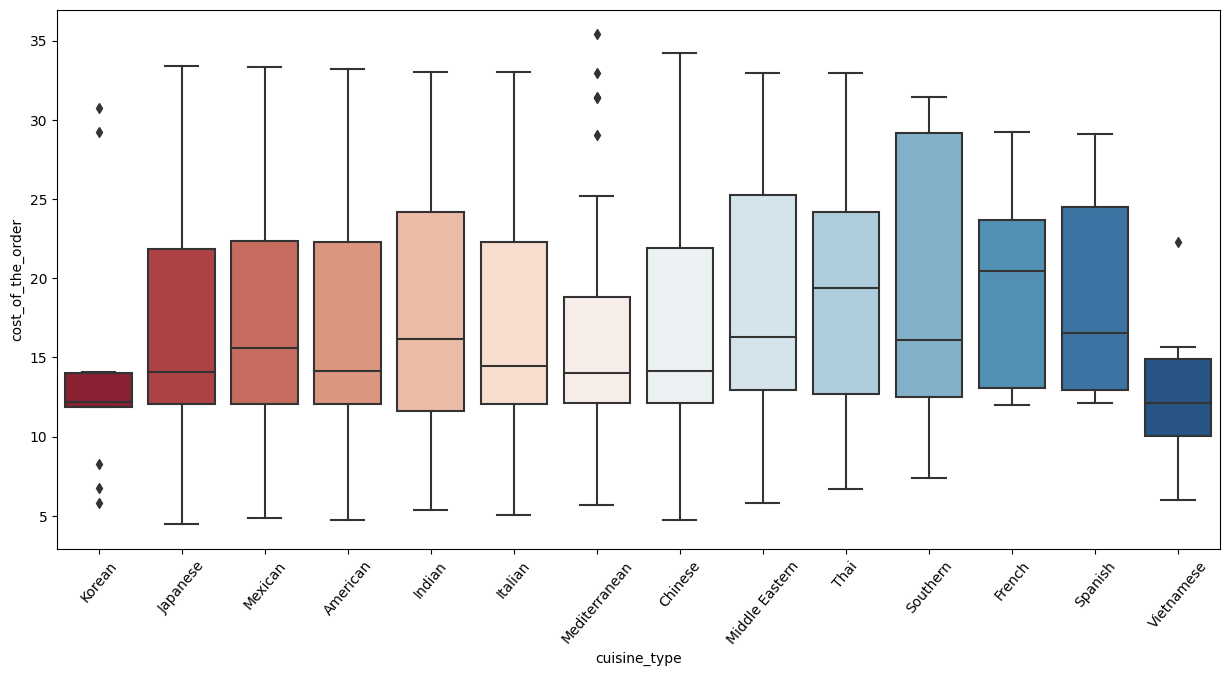

In [60]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'RdBu')
plt.xticks(rotation = 50)
plt.show()

* There are some outliers in the lower and upper Quartile in the cost of korean cuisine
* There are four outliers in the upper quartile of Mediterranean cuisine and one in the Vietnamese


##### Box plot to delivey time Vs day of the week

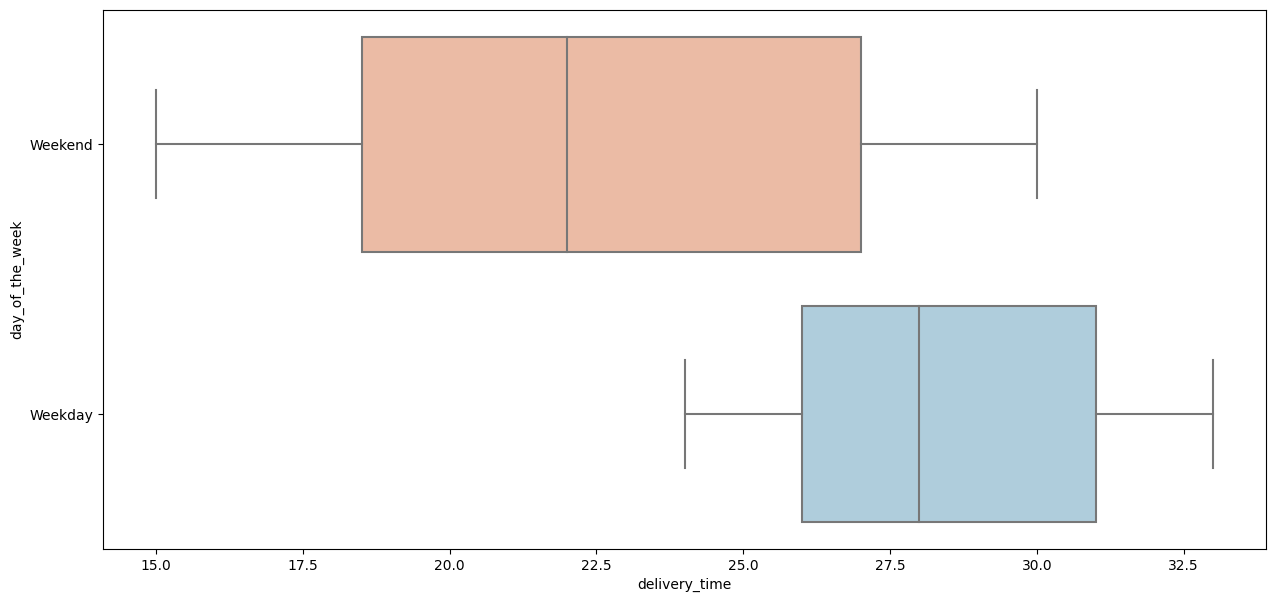

In [65]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "delivery_time", y = "day_of_the_week", data = df, palette = 'RdBu')  
plt.show()

* Delivery time is much quicker for a weekend delivery

#### Delivery time Vs Rating


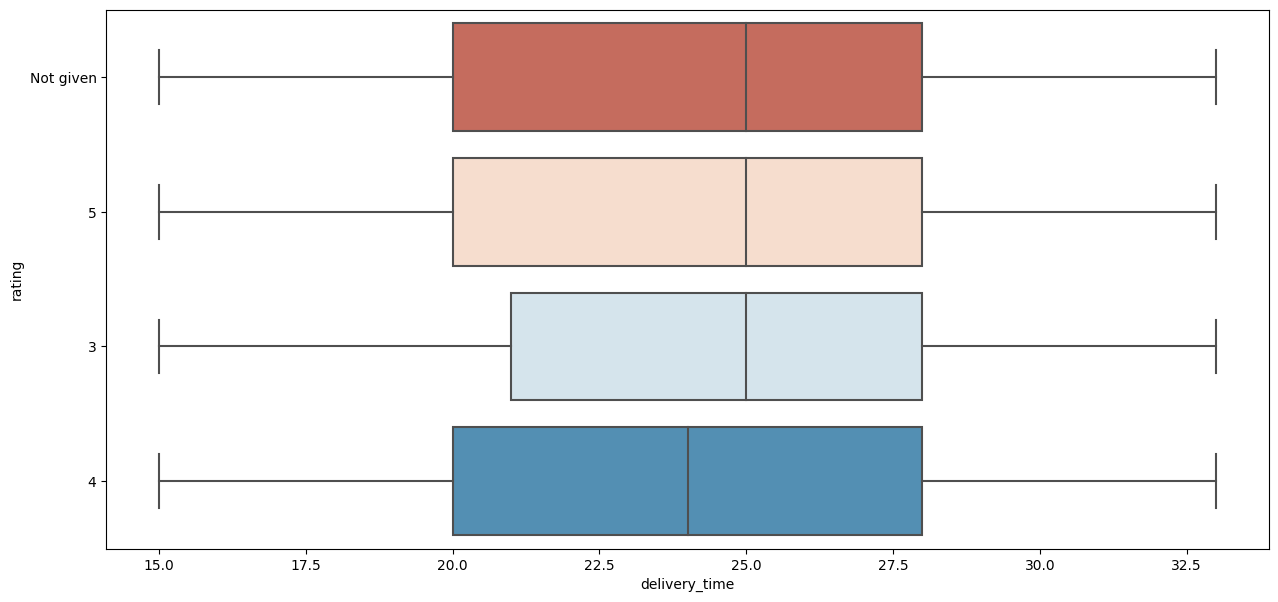

In [68]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "delivery_time", y = "rating", data = df, palette = 'RdBu')  
plt.show()

#### Rating Vs food preparation time 

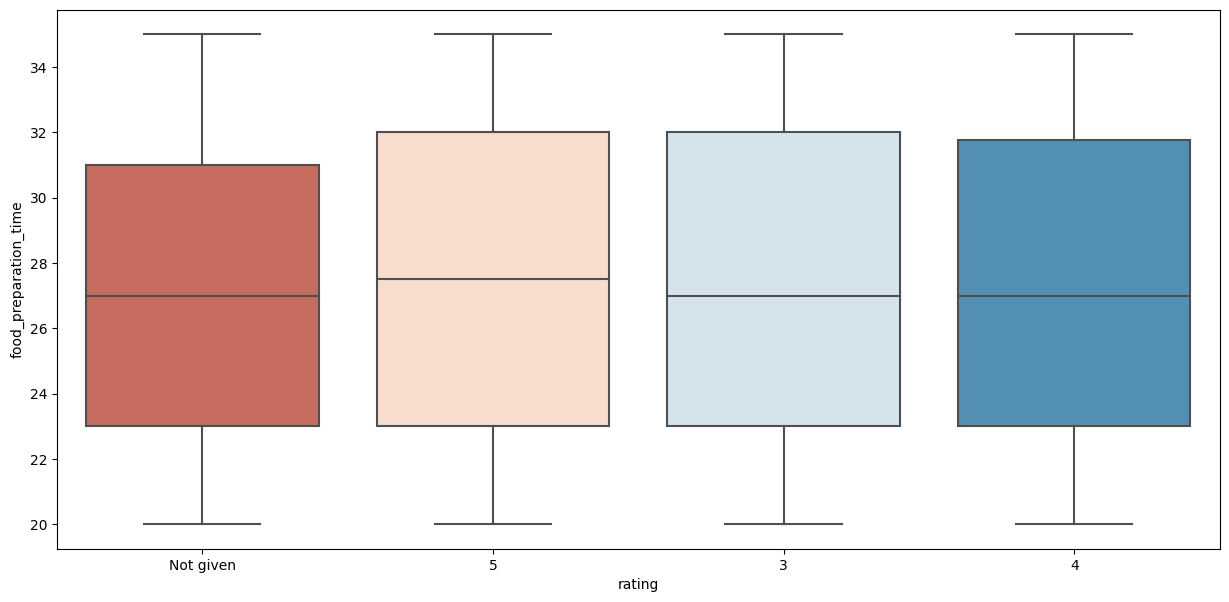

In [70]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.boxplot(x = "rating", y = "food_preparation_time", data = df, palette = 'RdBu')  
plt.show()

#### Rating Vs cost of the order 


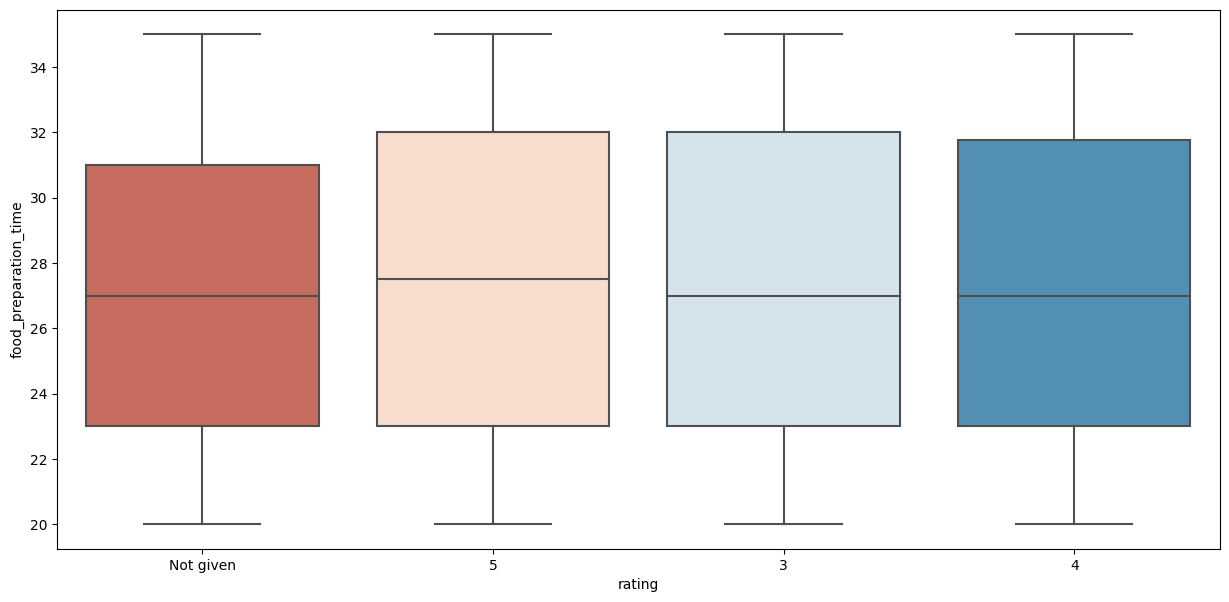

In [71]:
plt.figure(figsize=(15, 7))
sns.boxplot(x = "rating", y = "food_preparation_time", data = df, palette = 'RdBu')  
plt.show()

#### Correlation among variables

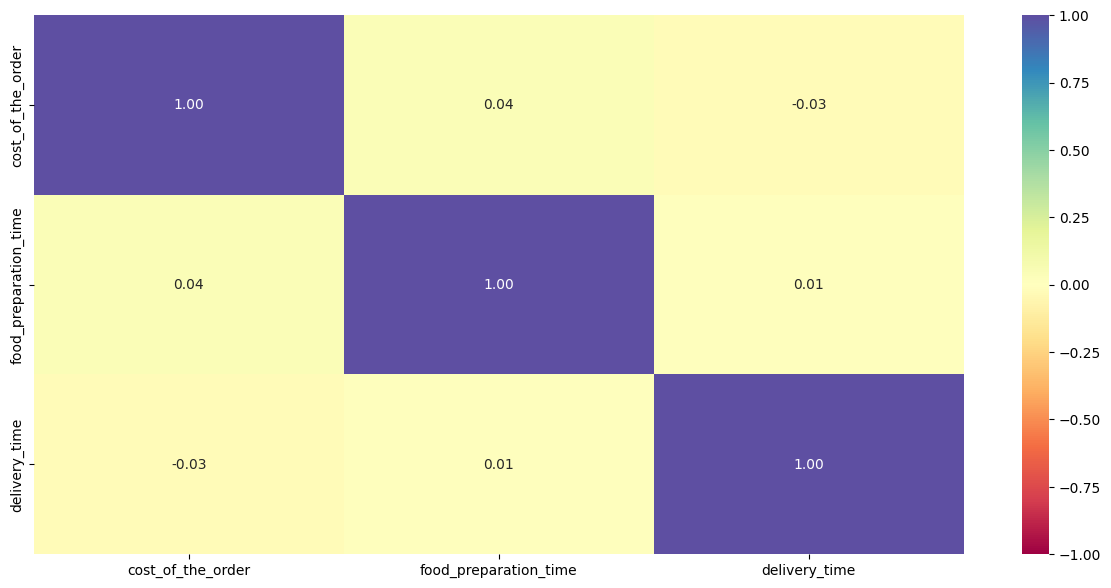

In [72]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Delivery time is positively correlated with food_preparation time , also Cost of the order and food preparation time have slight positive correlation 

In [83]:
# Write the code here
# code to find the count and mean of each rating 
rating_values=df['rating'].unique()
print(rating_values)
df=df.drop(df[df['rating'] =='not given'].index)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce').astype('Int64')
rating_restaurant=df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()
promotional_restaurant = rating_restaurant[(rating_restaurant['count']>50) & (rating_restaurant['mean']>4)]
print("Restaurants fulfilling promotional criteria are :\n",promotional_restaurant)

['Not given' '5' '3' '4']
Restaurants fulfilling promotional criteria are :
                restaurant_name  count      mean
20   Blue Ribbon Fried Chicken     64  4.328125
21           Blue Ribbon Sushi     73  4.219178
136                Shake Shack    133  4.278195
153          The Meatball Shop     84  4.511905


#### Observations:


* There are four restaurants with average rating 4 and above and with rating count more than 50
* shake shack , The meat ball shop and Blue Ribbon sushi are the top three restaurants

In [75]:
# Functions to apply charges
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) 
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [82]:
# Get the total revenue and print it
total_rev = df['Revenue'].sum()
print('The net revenue generated by the company is around', round(total_rev, 2), 'dollars')

The net revenue generated by the company is around 6166.3 dollars


In [90]:
# code to find the total time required to deliver food
df['time_to_deliver'] = df['food_preparation_time'] + df['delivery_time']
# applying condition time to deliver >60 and the percentage
df_time_to_deliver = df[df['time_to_deliver']>60]
percentage = df_time_to_deliver.shape[0]/df['time_to_deliver'].shape[0]*100
print(round(percentage,2),"%")



10.54 %


#### Observations:


10% of the total orders take more than 60 mins to get delivered to the customer.

In [77]:
# Write the code here
# Mean delivery time to deliver on a weekday
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')
# Mean delivery time to deliver on a weekend
print('Te mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
Te mean delivery time on weekends is around 22 minutes


#### Observations:


* Most of the orders delivered on a weekend is quicker than a weekday delivery

### Conclusion and Recommendations

### Conclusions:
*  Most of the orders are placed on weekends, and American cuisine is the most popular among customers.
* The average food preparation time is around 27 minutes, and the average delivery time is around 24 minutes.
* Around 39% of orders are not rated by customers. 
* The average delivery time is around 24 minutes, which can be considered reasonably efficient for a food delivery service.
* shake shack , The meat ball shop and Blue Ribbon sushi are the top three restaurants

### Recommendations:
* Offer targeted discounts and promotions to the top three most frequent customers to enhance customer loyalty.
* Promote restaurants with high ratings (above 4) and a significant number of orders (more than 50) to attract more customers and increase overall revenue.
* Focus on improving the delivery time during weekdays as it is slightly longer compared to weekends. Consider optimizing delivery routes and increasing the number of delivery personnel during peak hours.
* Encourage customers to provide feedback on their orders by offering incentives or discounts on future orders. This will help the company understand customer preferences and areas for improvement
* Conduct regular customer surveys to gather insights into customer satisfaction, preferences, and areas for improvement.
* Collaborate with restaurants offering popular cuisines like American, Japanese, Italian, and Chinese to increase the variety of food options available to customers.
* Monitor and manage outlier food preparation and delivery times to ensure consistency in service quality.

By implementing these recommendations, the food aggregator company can enhance customer experience, attract more customers, and ultimately improve the overall business






  